In [ ]:
!pip install theano
!pip install pymc3
!pip install seaborn

In [44]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm
import torch
from torch import tensor

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [6]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

In [7]:
model.basic_RVs

[mu, obs]

In [8]:
model.observed_RVs

[obs]

In [9]:
model.logp({'mu': 0})

array(-136.34115928)

In [11]:
N = len(hits)

with pm.Model() as baseball_model:

    phi = pm.Uniform('phi', lower=0.0, upper=1.0)

    kappa_log = pm.Exponential('kappa_log', lam=1.5)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta('thetas', alpha=phi*kappa, beta=(1.0-phi)*kappa, shape=N)
    y = pm.Binomial('y', n=at_bats, p=thetas, observed=hits)

NameError: name 'hits' is not defined

In [36]:
cov = np.array([[1., 0.5, .25], [0.5, 1, .25], [0.5, .5, 1]])
mu = np.zeros(3)
vals = pm.MvNormal.dist(mu=mu, cov=cov)

In [37]:
vals.random(size=4)

/Users/alexkotlar/miniconda3/lib/python3.7/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


array([[-0.40665494, -0.89711987,  0.21687559],
       [ 0.47522811,  0.40386292,  0.89941401],
       [ 2.17498881,  1.27131264,  0.02247411],
       [ 0.66763151,  0.75412747, -0.23671111]])

In [16]:
with pm.Model():
    x = pm.Normal('x', mu=0, sigma=1)
    print(x)

x


In [18]:
x = np.array([[0.00560805, 0.16788784, 0.06668699, 0.02216397, 0.21703139,
        0.        , 0.04982627, 0.00448644, 0.11845169, 0.21861628,
        0.00616885, 0.12307223],
       [0.19244308, 0.02297949, 0.09517768, 0.03622034, 0.07414341,
        0.19984624, 0.01186158, 0.11298382, 0.043279  , 0.09359883,
        0.08446663, 0.0329999 ],
       [0.22363757, 0.00368887, 0.08686129, 0.0055333 , 0.11712153,
        0.19620162, 0.0165999 , 0.09579527, 0.0055333 , 0.14657483,
        0.08769705, 0.01475547]])


In [19]:
n = x.shape[0]
K = x.shape[1]

with pm.Model() as model:
    alpha = pm.Multinomial("alpha", n=n, p=np.ones(12), shape=K)
    theta = pm.Dirichlet('theta', a=alpha, shape=K, observed=x)

    trace = pm.sample(draws=1000) 


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 11066.77draws/s]
/Users/alexkotlar/miniconda3/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [20]:
y = pm.Binomial.dist(n=10, p=0.5)

In [22]:
y.random(size=3)

array([6, 4, 5])

In [39]:
np.random.normal?


Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Output shape.  If t

NameError: name 'data' is not defined

In [42]:
%load_ext autoreload
%autoreload 2

In [41]:
from mvl import genData, likelihoods

IN


In [47]:
rrsSimRun = tensor([2, 2, 1.5])
pisSimRun = tensor([.05, .05, .05])

nCases = tensor([15e3, 15e3, 6e3])
nCtrls = tensor(5e5)
i = 0

In [52]:
afMeanRun = 1e-4
generatingFn = genData.v6normal
testParams = genData.genParams(rrMeans=rrsSimRun, pis=pisSimRun, afMean=afMeanRun, rrShape=tensor(50.), afShape=tensor(50.), nCases=nCases, nCtrls=nCtrls)[0]
testData = generatingFn(**testParams)

pDs are: tensor([0.0280, 0.0280, 0.0112])
TESTING WITH: nCases tensor([15000., 15000.,  6000.]) nCtrls tensor(500000.) rrMeans tensor([2.0000, 2.0000, 1.5000]) rrShape tensor(50.) afMean 0.0001 afShape tensor(50.) diseaseFractions tensor([0.0500, 0.0500, 0.0500]) pDs tensor([0.0280, 0.0280, 0.0112])
tensor([[2.9948, 4.8683, 6.7549],
        [3.2899, 4.2783, 5.3981],
        [3.5513, 4.1198, 6.0172],
        ...,
        [4.2848, 4.2333, 5.1465],
        [2.9802, 2.6808, 5.0894],
        [2.1920, 2.9585, 5.5584]], dtype=torch.float64)
startIndices [0, tensor(1000.), tensor(2000.)] endIndices tensor([1000., 2000., 3000.])
totalSamples 536000


In [ ]:
testData

logp = -3.3818e+06, ||grad|| = 5.042e+05: 100%|██████████| 10/10 [00:00<00:00, 57.15it/s] 
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w]
>Metropolis: [lam4]
>Metropolis: [lam3]
>Metropolis: [lam2]
>Metropolis: [lam1]
Sampling 4 chains, 0 divergences:   3%|▎         | 6568/202000 [03:18<1:38:16, 33.14draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


        mean      sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
lam1  13.118  20.623   0.918   48.861     10.274    7.867       4.0     4.0   
lam2  13.771  21.208   0.434   50.673     10.565    8.090       4.0     4.0   
lam3  14.898  19.676   0.689   48.864      9.802    7.506       4.0     4.0   
lam4  26.127  20.224   5.601   48.927     10.074    7.714       4.0     4.0   
w[0]   0.498   0.157   0.247    0.682      0.078    0.060       4.0     4.0   
w[1]   0.238   0.086   0.159    0.408      0.042    0.032       4.0     4.0   
w[2]   0.172   0.124   0.031    0.337      0.061    0.047       4.0     4.0   
w[3]   0.092   0.093   0.017    0.251      0.046    0.035       4.0     4.0   

      ess_bulk  ess_tail  r_hat  
lam1       4.0      11.0   3.34  
lam2       4.0      10.0   3.68  
lam3       5.0      26.0   2.88  
lam4       4.0      11.0   3.28  
w[0]       5.0      29.0   2.96  
w[1]       5.0      16.0   2.53  
w[2]       5.0      11.0   2.98  
w[3]       5.0  

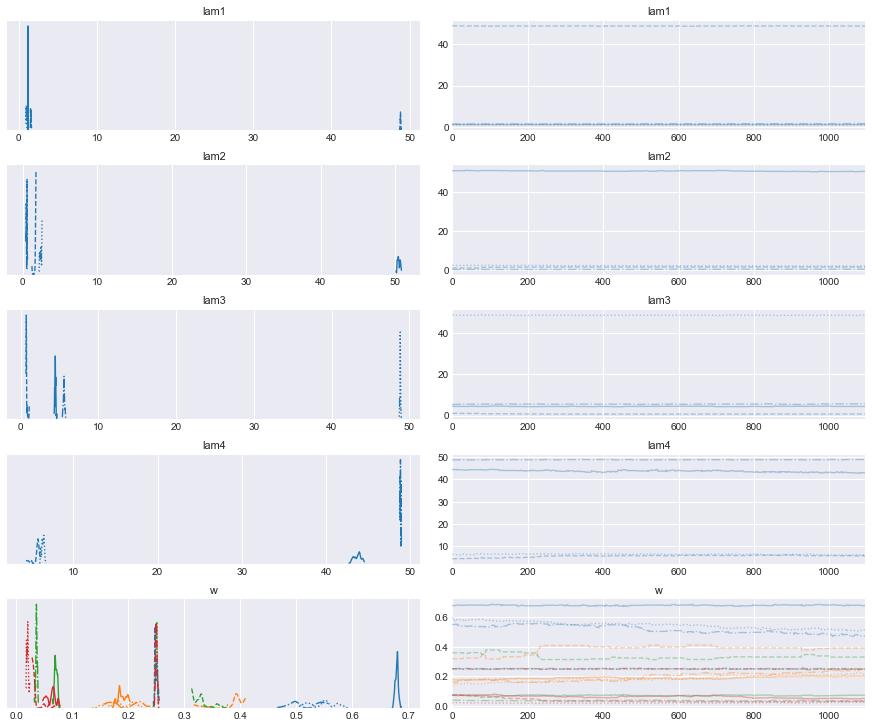

In [63]:
# 2-Mixture Poisson using iterable of distributions.
with pm.Model() as model:
    lam1 = pm.Exponential('lam1', lam=1)
    lam2 = pm.Exponential('lam2', lam=1)
    lam3 = pm.Exponential('lam3', lam=1)
    lam4 = pm.Exponential('lam4', lam=1)

    pois1 = pm.Poisson.dist(mu=lam1)
    pois2 = pm.Poisson.dist(mu=lam2)
    pois3 = pm.Poisson.dist(mu=lam3)
    pois4 = pm.Poisson.dist(mu=lam4)

    w = pm.Dirichlet('w', a=np.array([1, 1, 1, 1]))

    like = pm.Mixture('like', w=w, comp_dists = [pois1, pois2, pois3, pois4], observed=testData["altCounts"].numpy())
    
    start = pm.find_MAP(model = model)
    step = pm.Metropolis()
    trace = pm.sample(50000, step = step,start=start)
    
pm.traceplot(trace)
print(pm.summary(trace))

In [62]:
like.dist

AttributeError: 'ObservedRV' object has no attribute 'dist'